# Creating Embeddings

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm

# Drawing the embeddings
import matplotlib.pyplot as plt

# Deep learning: 
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

#### Loading custom functions

In [8]:
import sys
sys.path.insert(0, '..')

# We load custom functions from a python file
from extra.utility import text_preprocessing, create_unique_word_dict


### Read data

In [9]:
# Load df
df = pd.read_csv(
    "../data/ChatGPT-play-reviews_prep.csv",
    encoding="utf-8",
)

# var for review received response
df["score_cat"] = np.where(df.score == 5, "positive", np.where(df.score == 4, "neutral", "negative"))

texts = [x for x in df['content']]
texts

['ChatGPT on Android is a solid app with seamless OpenAI server connectivity, ensuring smooth interactions. However, it falls behind its Apple counterpart in features and updates. The voice input can be prematurely triggered by pauses, unlike on Apple. Additionally, the lack of a search function for previous messages is a drawback. Despite these, it remains a commendable app, deserving a 4-5 star rating. With minor improvements, it can match its Apple version.',
 "I've been using chatGPT for a while but I've just tested out the microphone speech recognition option for the first time, and let's say... I'M COMPLETELY BLOWN AWAY. NO, SERIOUSLY. It literally puts ALL the expressions, punctuation, in the right place. No matter how you talk, it converts it without a problem. It's amazing and I will probably will never type to ChatGPT again! Still though... that's some outstanding work. Now we wait for voice responses from the Bot! Hopefully...",
 "The ChatGPT Android app has completely blown

Setting `window=2` to create pairs of 2 words occurring together in the dataset.

In [10]:
# Defining the window for context
window = 3

# Creating a placeholder for the scanning of the word list
word_lists = []
all_text = []

- We go through all the sentences in the dataset. Preprocess the sentences (tokenize and remove stop words)
- We then create pair of words which occur near to each other in a window size equal 2.
  - A pair is created for two words say `a` and `b` like `a,b` and `b,a`

In [11]:
import string 
import spacy
from spacy.lang.en.stop_words import STOP_WORDS 
from spacy.lang.en import English

# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = spacy.load("en_core_web_sm")
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = nlp(sentence)
    # Lemmatizing each token and converting each token into lowercase
    mytokens = [token.lemma_.lower().strip() if token.lemma_ != "-PRON-" else token.lower_ for token in mytokens]
    # Removing stop words
    mytokens = [token for token in mytokens if token not in stop_words and token not in punctuations ]
    # return preprocessed list of tokens
    print(mytokens)
    return mytokens

In [12]:
for text in texts:

    # Cleaning the text
    text = spacy_tokenizer(text)

    # Appending to the all text list
    all_text += text 

    # Creating a context dictionary
    for i, word in enumerate(text):
        for w in range(window):
            # Getting the context that is ahead by *window* words
            if i + 1 + w < len(text): 
                word_lists.append([word] + [text[(i + 1 + w)]])
            # Getting the context that is behind by *window* words    
            if i - w - 1 >= 0:
                word_lists.append([word] + [text[(i - w - 1)]])


['chatgpt', 'android', 'solid', 'app', 'seamless', 'openai', 'server', 'connectivity', 'ensure', 'smooth', 'interaction', 'fall', 'apple', 'counterpart', 'feature', 'update', 'voice', 'input', 'prematurely', 'trigger', 'pause', 'unlike', 'apple', 'additionally', 'lack', 'search', 'function', 'previous', 'message', 'drawback', 'despite', 'remain', 'commendable', 'app', 'deserve', '4', '5', 'star', 'rating', 'minor', 'improvement', 'match', 'apple', 'version']
['use', 'chatgpt', 'test', 'microphone', 'speech', 'recognition', 'option', 'time', 'let', '...', "i'm", 'completely', 'blow', 'away', 'seriously', 'literally', 'expression', 'punctuation', 'right', 'place', 'matter', 'talk', 'convert', 'problem', 'amazing', 'probably', 'type', 'chatgpt', '...', 'outstanding', 'work', 'wait', 'voice', 'response', 'bot', 'hopefully', '...']
['chatgpt', 'android', 'app', 'completely', 'blow', 'away', 'exceptional', 'performance', 'versatility', 'ai', 'language', 'model', 'consistently', 'deliver', 'i

In [13]:
word_lists

[['chatgpt', 'android'],
 ['chatgpt', 'solid'],
 ['chatgpt', 'app'],
 ['android', 'solid'],
 ['android', 'chatgpt'],
 ['android', 'app'],
 ['android', 'seamless'],
 ['solid', 'app'],
 ['solid', 'android'],
 ['solid', 'seamless'],
 ['solid', 'chatgpt'],
 ['solid', 'openai'],
 ['app', 'seamless'],
 ['app', 'solid'],
 ['app', 'openai'],
 ['app', 'android'],
 ['app', 'server'],
 ['app', 'chatgpt'],
 ['seamless', 'openai'],
 ['seamless', 'app'],
 ['seamless', 'server'],
 ['seamless', 'solid'],
 ['seamless', 'connectivity'],
 ['seamless', 'android'],
 ['openai', 'server'],
 ['openai', 'seamless'],
 ['openai', 'connectivity'],
 ['openai', 'app'],
 ['openai', 'ensure'],
 ['openai', 'solid'],
 ['server', 'connectivity'],
 ['server', 'openai'],
 ['server', 'ensure'],
 ['server', 'seamless'],
 ['server', 'smooth'],
 ['server', 'app'],
 ['connectivity', 'ensure'],
 ['connectivity', 'server'],
 ['connectivity', 'smooth'],
 ['connectivity', 'openai'],
 ['connectivity', 'interaction'],
 ['connectivit

Taking out all the unique words from our dataset

In [14]:
unique_word_dict = create_unique_word_dict(all_text)

In [15]:
unique_word_dict

{'"as': 0,
 '"constructe': 1,
 '"greete': 2,
 '"scary': 3,
 "'cause": 4,
 "'cuz": 5,
 '(:': 6,
 '(right': 7,
 '(signs': 8,
 '(you': 9,
 '):': 10,
 '+1b': 11,
 '+2': 12,
 '+27': 13,
 ',m': 14,
 ',with': 15,
 '--': 16,
 '---': 17,
 '---------': 18,
 '-----------': 19,
 '-------------': 20,
 '--------------': 21,
 '---------------------------------------': 22,
 '----------------------------------------': 23,
 '--------------sounds': 24,
 '-1': 25,
 '-1/100': 26,
 '-17': 27,
 '-=': 28,
 '-\\sin\\left(\\frac{\\pi}{2}t\\right': 29,
 '-_-': 30,
 '-ai': 31,
 '-aske': 32,
 '-by': 33,
 '-chatgpt': 34,
 '-describe': 35,
 '-dr': 36,
 '-explain': 37,
 '-kyle': 38,
 '-me': 39,
 '-oh': 40,
 '-p': 41,
 '-sin(a+b': 42,
 '-sin(x': 43,
 '-up': 44,
 '-update': 45,
 '-write': 46,
 '-written': 47,
 '..': 48,
 '...': 49,
 '....': 50,
 '.....': 51,
 '......': 52,
 '.......': 53,
 '........': 54,
 '.........': 55,
 '..........': 56,
 '...........': 57,
 '.............': 58,
 '................': 59,
 '.........

In [16]:
# Defining the number of features (unique words)
n_words = len(unique_word_dict)

# Getting all the unique words 
words = list(unique_word_dict.keys())

In [17]:
# Creating the X and Y matrices using one hot encoding
X = []
Y = []

for i, word_list in tqdm(enumerate(word_lists)):
    # Getting the indices
    main_word_index = unique_word_dict.get(word_list[0])
    context_word_index = unique_word_dict.get(word_list[1])

    # Creating the placeholders   
    X_row = np.zeros(n_words)
    Y_row = np.zeros(n_words)

    # One hot encoding the main word
    X_row[main_word_index] = 1

    # One hot encoding the Y matrix words 
    Y_row[context_word_index] = 1

    # Appending to the main matrices
    X.append(X_row)
    Y.append(Y_row)

0it [00:00, ?it/s]

116296it [00:05, 20419.80it/s]

: 

In [11]:
# converting lists to Numpy arrays
X = np.asarray(X)
Y = np.asarray(Y)


In [12]:
# Defining the size of the embedding
embed_size = 2

We build a 1 layer Neural network, with an `input dimension = total number of unique words`, which represents our vocabulary. And the `output dimension = size of vocabulary` to get the embeddings for each word of same dimension.

In [13]:
# Defining the neural network
model = Sequential()

# layers
model.add(Dense(units = embed_size, activation = 'linear', input_dim = X.shape[1]))
model.add(Dense(units = Y.shape[1], activation = 'softmax'))


# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 44        
                                                                 
 dense_1 (Dense)             (None, 21)                63        
                                                                 
Total params: 107
Trainable params: 107
Non-trainable params: 0
_________________________________________________________________
None


In [14]:

# Optimizing the network weights
model.fit(
    x=X, 
    y=Y, 
    batch_size=256,
    epochs=1000
    )


Epoch 1/1000


2023-10-20 20:40:20.887345: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 4s 4s/step - loss: 3.0607
Epoch 2/1000
1/1 [==============================] - 0s 25ms/step - loss: 3.0596
Epoch 3/1000
1/1 [==============================] - 0s 16ms/step - loss: 3.0585
Epoch 4/1000
1/1 [==============================] - 0s 16ms/step - loss: 3.0574
Epoch 5/1000
1/1 [==============================] - 0s 14ms/step - loss: 3.0564
Epoch 6/1000
1/1 [==============================] - 0s 14ms/step - loss: 3.0553
Epoch 7/1000
1/1 [==============================] - 0s 17ms/step - loss: 3.0542
Epoch 8/1000
1/1 [==============================] - 0s 16ms/step - loss: 3.0531
Epoch 9/1000
1/1 [==============================] - 0s 14ms/step - loss: 3.0521
Epoch 10/1000
1/1 [==============================] - 0s 14ms/step - loss: 3.0510
Epoch 11/1000
1/1 [==============================] - 0s 14ms/step - loss: 3.0500
Epoch 12/1000
1/1 [==============================] - 0s 14ms/step - loss: 3.0489
Epoch 13/1000
1/1 [==============================] -

After training the network, we extract the trained weights from the first layer of the neural network, which will be the embeddings for our vocabulary

In [15]:
# The input layer 
weights = model.get_weights()[0]

In [16]:
# Creating a dictionary to store the embeddings in. The key is a unique word and 
# the value is the numeric vector
embedding_dict = {}
for word in words: 
    embedding_dict.update({
        word: weights[unique_word_dict.get(word)]
        })

#### 2D visualization

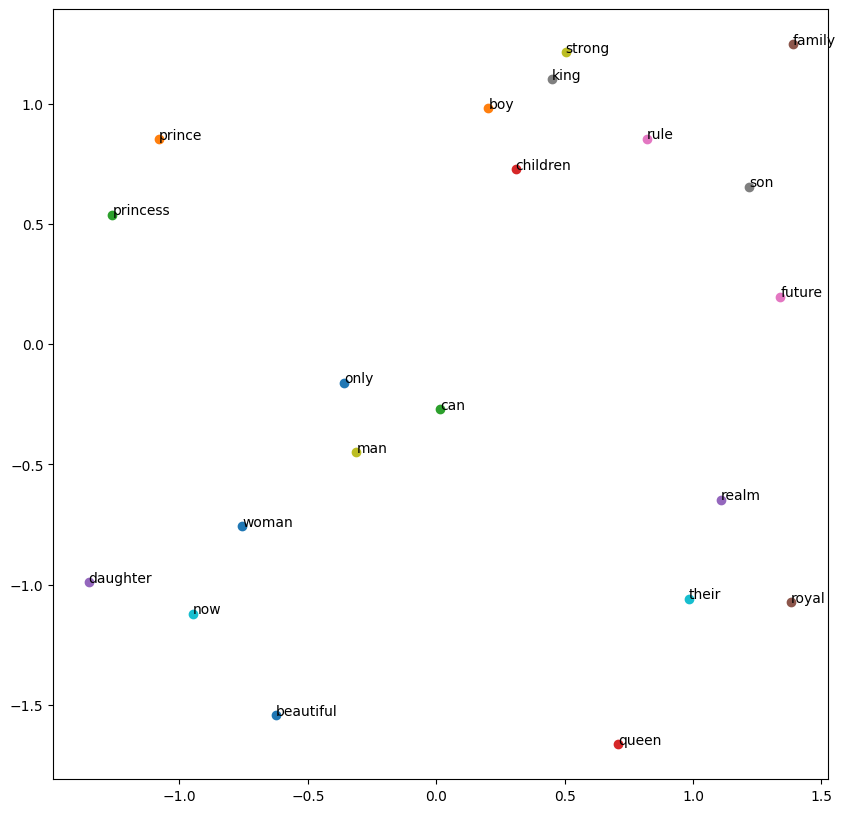

In [17]:
# Plotting the embeddings
plt.figure(figsize=(10, 10))
for word in list(unique_word_dict.keys()):
    coord = embedding_dict.get(word)
    plt.scatter(coord[0], coord[1])
    plt.annotate(word, (coord[0], coord[1]))       


#### Visualization in 3D

We can also visualize the embeddings in 3-dimensions. For this change the `embed_size` to `3` by scrolling 5-6 cells above and running the cells again. Also Uncomment the code cell below to visualize embeddings in 3D

IndexError: index 2 is out of bounds for axis 0 with size 2

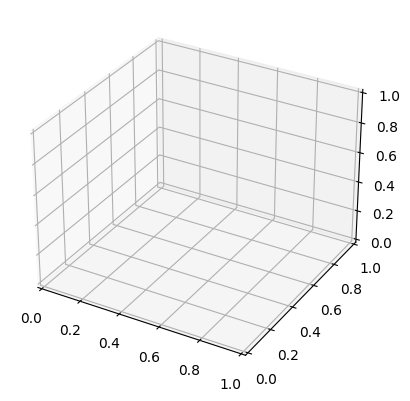

<Figure size 1000x1000 with 0 Axes>

In [21]:
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# # Plotting the embeddings
# plt.figure(figsize=(10, 10))
# for word in list(unique_word_dict.keys()):
#     coord = embedding_dict.get(word)
#     ax.scatter(coord[0], coord[1],coord[2])
#     ax.text(coord[0], coord[1], coord[2],word)    

In [19]:
# Saving the embedding vector to a txt file
try:
    os.mkdir(f'{os.getcwd()}//embeddings_output')        
except Exception as e:
    print(f'Cannot create output folder: {e}')

In [20]:
with open(f'{os.getcwd()}//embeddings_output//embedding.txt', 'w') as f:
    for key, value in embedding_dict.items():
        try:
            f.write(f'{key}: {value}\n')   
        except Exception as e:
            print(f'Cannot write word {key} to dict: {e}') 

 - These embeddings are later used on a large scale as an Embedding layer in different neural networks trained for NLP tasks <br> 
 - As we increase the embedding size, i.e., the size of the vector for each word in the vocabulary, the more accurate we get the results. <br> 
 - Try changing the embedding size to 3 (but the plot will have to be 3D then). Try plotting it on the same 2D scatter plot and notice if there are any differences.